In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')
drive.mount('/content/drive')
from transformers import pipeline

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/NLP project/'

In [ ]:
pipe = pipeline("translation", model="glazzova/ml_translation_model1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
df = pd.read_csv(path + 'preprocessed_df.csv')

In [ ]:
df

,Unnamed: 0,category,rating,label,text
0,0,restaurant,5,0,unlike next we d eaten previous night dish com...
1,1,restaurant,5,0,probably one best meals i ve ever it s perform...
2,2,restaurant,3,0,service impeccable experience presentation coo...
3,3,restaurant,3,0,the problem places like this given exhorbitant...
4,4,restaurant,5,0,i idea write review dining alinea brings whole...
...,...,...,...,...,...
53911,53911,restaurant,4,0,it s taco bell higher prices taco bell what st...
53912,53912,restaurant,5,0,yellow rose favorite mine i d go every day i c...
53913,53913,restaurant,3,0,not bad we ate odd wicker seats inviting we at...
53914,53914,restaurant,3,0,we surprised eagerly roped pop trivia game upo...


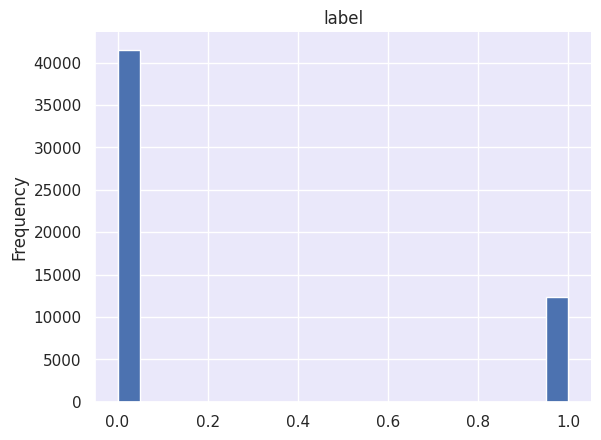

In [ ]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = df.dropna(axis=0, ignore_index=True)

In [ ]:
max_len = 0
id_mx = 0
for i in range(len(df)):
    try:
        l = len(df['text'].loc[i].split())
        if l > max_len:
            max_len = l
            id_mx = i
    except:
        print(df['text'].loc[i])

print(max_len, id_mx)

589 1087


In [ ]:
min_len = max_len
id_mn = 0
for i in range(len(df)):
    try:
        l = len(df['text'].loc[i].split())
        if l < min_len:
            min_len = l
            id_mn = i
    except:
        print(df['text'].loc[i])

print(min_len, id_mn)

1 714


In [ ]:
df['text'].loc[714]

'dude'

In [ ]:
import nltk

stemmer = nltk.stem.SnowballStemmer(language='english')
message = stemmer.stem(df['text'].values[501])
print(message)

this favorite place chicago the food unbelievable the beer list good the pork belly unbelievable decor fine servers fine general staff fine who cares stuff presented incredible oysters pork my girlfriend i spent  hours there had nine different dishes including oysters pork belly frites eggs house pickles ricotta dessert espresso and two beers all less  so good


In [ ]:
pipe(test, max_length=1000)

[{'translation_text': 'Я наконец-то сделал алинейку , я услышал много алинии , я мог позволить себе сюрприз , бойфренд , у которого ушёл день рождения , или , может быть , я сказал : « Курсы на небесах , декорация , усердно работая над идеальным сервисом , удушающий удивительную пищу для презентаций , возможно , я предвидел , что я шел с тех пор , как я впервые прочитал ее , , что горячий картофель холодной картошки великолепен , взрыв черных трюфелей , чтобы умереть из-за отличной еды , который , по словам моего бф , правильно означает , это , если хороший вкус путешественника мирового класса , вероятно , уже заставил нас отдохнуть рестораном , которое стоит экономить для идеального специального случая респираторных курсов , уже установленных и высокой цены , но оно того стоит , чтобы не ожидать , что я вернусь на несколько курсов , я знаю .'}]

In [ ]:
max_len

589

In [ ]:
translate_text('ru', test)

RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7e92b4c00fa0>)

In [11]:
import json

df = 0
with open('/content/drive/My Drive/NLP project/test.json', 'r') as file:
    js = json.loads(file.read())
    df = pd.DataFrame(js)

df.head()

,id,text
0,0,Hello world
1,1,Many many money
2,2,swag on my mind cuz im gonna be high
